In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
from IPython.display import display
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from numpy import random

In [2]:
###   INFORMATIONS SUR LES VALEURS DU CSV   ###

###   age: age in years
###   sex: sex (1 = male; 0 = female)
###   cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
###   trestbps: resting blood pressure (in mm Hg on admission to the hospital)
###   chol: serum cholestoral in mg/dl
###   fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
###   restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
###   thalach: maximum heart rate achieved
###   exang: exercise induced angina (1 = yes; 0 = no)
###   oldpeak = ST depression induced by exercise relative to rest
###   slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
###   ca: number of major vessels (0-3) colored by flourosopy
###   thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
# définission des variables pour la récupération des données
datapath = "C:\\Users\\LnD\\Documents\\Formation Data\\ML\\validation"
file = "heart_disease.csv"

###   FONCTIONS   ###
def acquisition_donnees(datapath, file):
    full_path = os.path.join(datapath, file)
    df = pd.read_csv(full_path)
    display(df.head(10))
    display(df.tail(10))
    display(df.describe())
    return df
    
def histogrammes(df):
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Histogramme de resting blood pressure (trestbps)
    hb = axs[0].hist2d(df.index, df['trestbps'], bins=(30, 30), cmap=plt.cm.jet)
    axs[0].set_xlabel('Age')
    axs[0].set_ylabel('Resting Blood Pressure (mm Hg)')
    axs[0].set_title('Resting Blood Pressure (trestbps) vs Age')
    plt.colorbar(hb[3], ax=axs[0])

    # Histogramme de serum cholestoral (chol)
    hc = axs[1].hist2d(df.index, df['chol'], bins=(30, 30), cmap=plt.cm.jet)
    axs[1].set_xlabel('Age')
    axs[1].set_ylabel('Serum Cholestoral (mg/dl)')
    axs[1].set_title('Serum Cholestoral (chol) vs Age')
    plt.colorbar(hc[3], ax=axs[1])

    # Histogramme de maximum heart rate achieved (thalach)
    ht = axs[2].hist2d(df.index, df['thalach'], bins=(30, 30), cmap=plt.cm.jet)
    axs[2].set_xlabel('Age')
    axs[2].set_ylabel('Maximum Heart Rate Achieved')
    axs[2].set_title('Maximum Heart Rate Achieved (thalach) vs Age')
    plt.colorbar(ht[3], ax=axs[2])

    plt.tight_layout()
    plt.show()

def correlation_heatmap(df):
    # Calcul de la matrice de corrélation
    corr_matrix = df.corr()

    # Tracé de la carte de chaleur (heatmap)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matrice de Corrélation entre les Variables Continues')
    plt.show()

def plot_continuous_vs_categorical(df, continuous_var, categorical_var):
    # Remplacer les valeurs 0 et 1 par des étiquettes significatives
    df[categorical_var] = df[categorical_var].replace({0: 'Female', 1: 'Male'})

    # Tracé de la boite à moustache
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_var, y=continuous_var, data=df)
    plt.xlabel(categorical_var)
    plt.ylabel(continuous_var)
    plt.title(f"{continuous_var} vs {categorical_var}")
    plt.show()

def plot_distribution_by_category(df, continuous_var, categorical_var):
    # Remplacer les valeurs par des étiquettes significatives
    df[categorical_var] = df[categorical_var].replace({0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'})

    # Tracé de la boite à moustache
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_var, y=continuous_var, data=df)
    plt.xlabel(categorical_var)
    plt.ylabel(continuous_var)
    plt.title(f"Distribution de {continuous_var} par {categorical_var}")
    plt.show()

def plot_continuous_vs_target(df, target_var, continuous_var):
    # Remplacer les valeurs par des étiquettes significatives
    df[target_var] = df[target_var].replace({0: 'Sein', 1: 'Maladie cardiaque'})

    # Tracé de la boite à moustache
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target_var, y=continuous_var, data=df)
    plt.ylabel(continuous_var)
    plt.title(f"{continuous_var} vs {target_var}")
    plt.xlabel(target_var)
    plt.show()

def comparatif(liste_colonnes, df):
    while len(liste_colonnes)>1:
        for col in liste_colonnes:
            premier = liste_colonnes[0]
            reste = liste_colonnes[1:]
            for r in reste:
                plt.figure()  # Créez une nouvelle figure pour chaque graphique
                plt.scatter(df[premier], df[r])
                plt.title(f"Nuage de points de {r} en fonction de {premier}")
                plt.xlabel(premier)
                plt.ylabel(r)
                plt.show()
            liste_colonnes = reste

def kmeans(donnees):
    # tableau de valeurs des inerties
    inertie = []
    
    # Nombre maximal de clusters à essayer
    nombre_max_clusters = 14  
    for i in range(1, nombre_max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(donnees)
        inertie.append(kmeans.inertia_)
    
    plt.plot(range(1, nombre_max_clusters + 1), inertie, marker='o')
    plt.title('Graphique de l\'inertie')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie')
    plt.show()
    
def nouvelles_variables(y1,y2,y3,y4,age,sex,cp,trestbps):
    plt.figure(figsize=(12, 8))
    
    # Tester tous les y entre eux
    plt.scatter(y1, y2, color='#FF5733', label='y1 vs y2')
    plt.scatter(y1, y3, color='#FFA500', label='y1 vs y3')
    plt.scatter(y1, y4, color='#FFFF00', label='y1 vs y4')
    plt.scatter(y2, y3, color='#FF007F', label='y2 vs y3')
    plt.scatter(y2, y4, color='#FF00FF', label='y2 vs y4')
    plt.scatter(y3, y4, color='#8B4513', label='y3 vs y4')
    
    # Tester tous les 4 autres paramètres entre eux
    plt.scatter(age, sex, color='#0000FF', label='age vs sex')
    plt.scatter(age, cp, color='#00FFFF', label='age vs cp')
    plt.scatter(age, trestbps, color='#008000', label='age vs trestbps')
    plt.scatter(cp, sex, color='#40E0D0', label='cp vs sex')
    plt.scatter(cp, trestbps, color='#800080', label='cp vs trestbps')
    plt.scatter(sex, trestbps, color='#808080', label='sex vs trestbps')
    
    plt.legend()
    plt.show()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


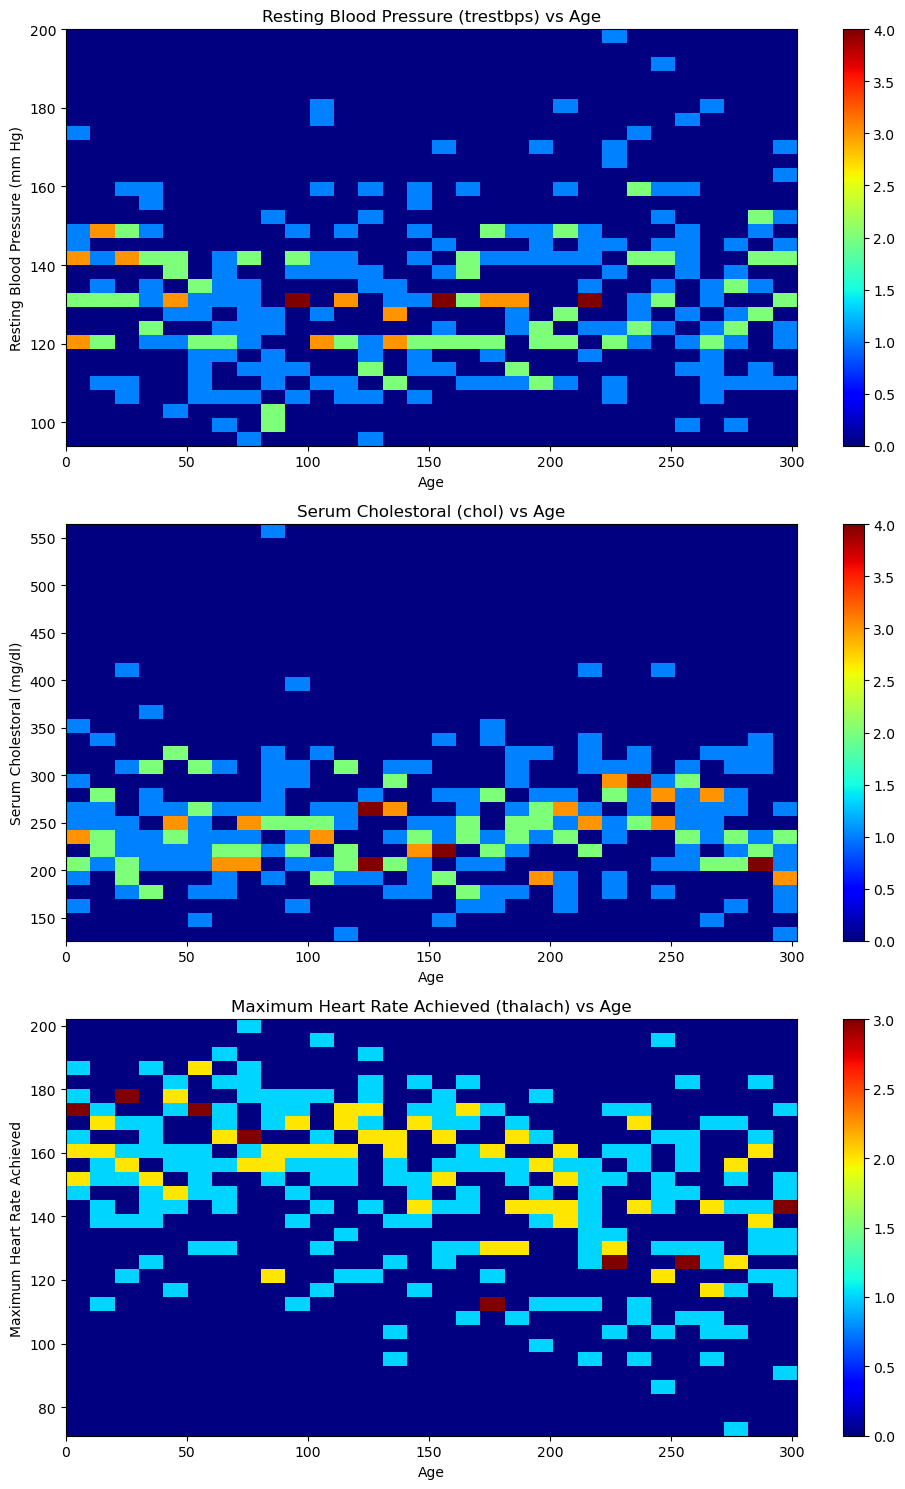

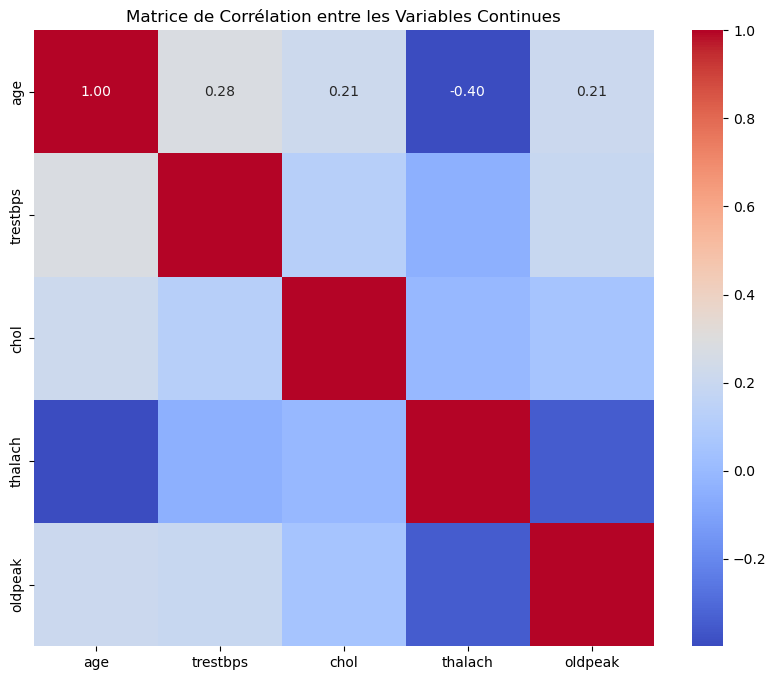

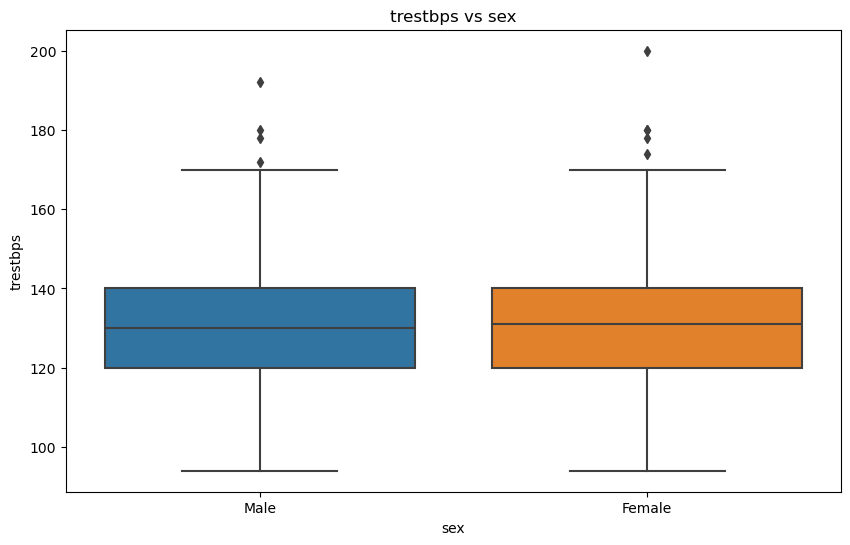

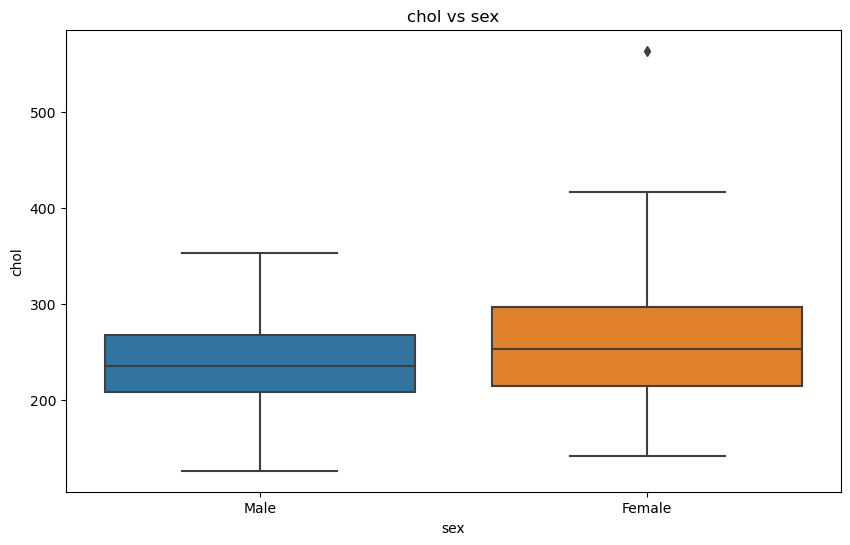

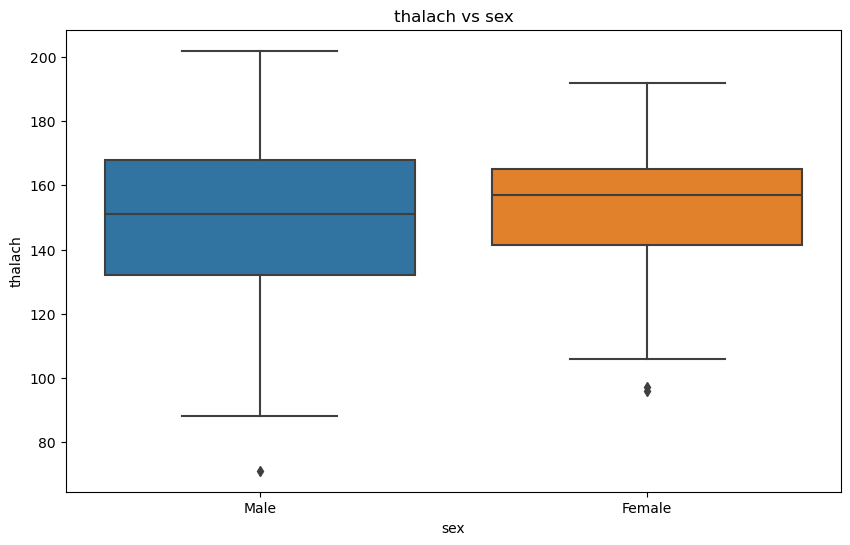

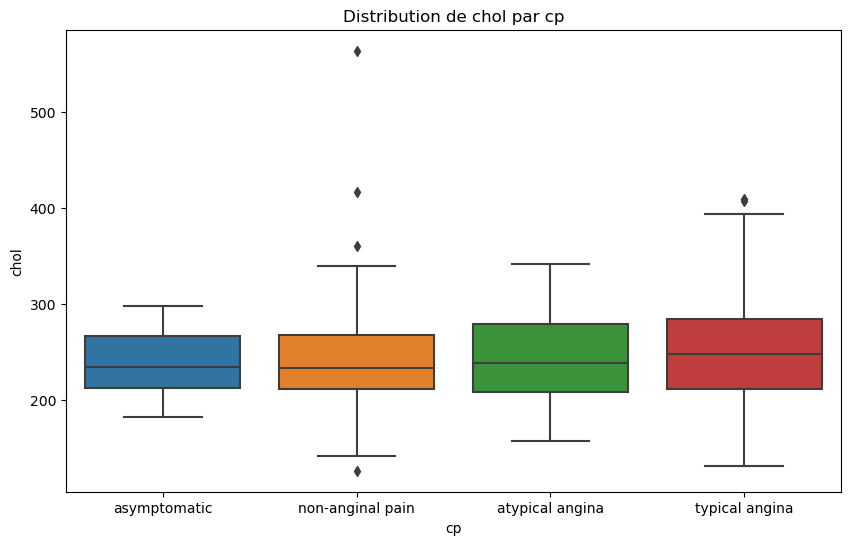

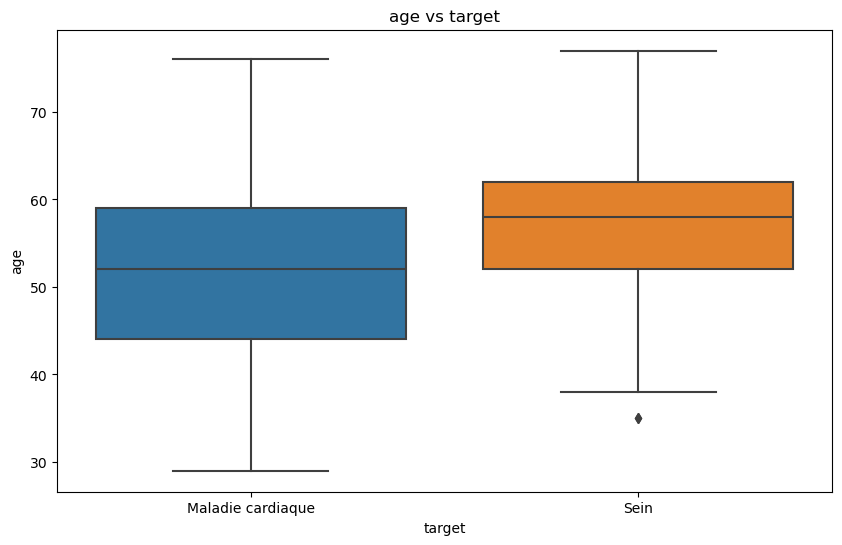

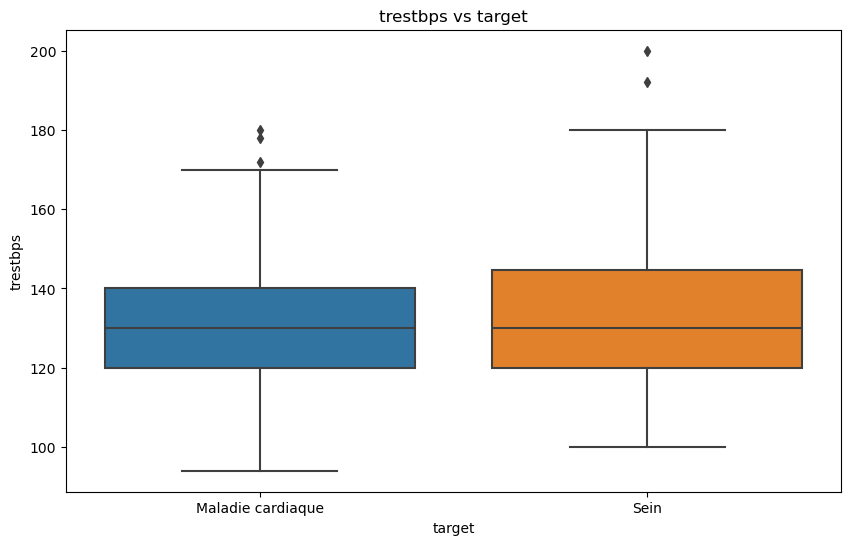

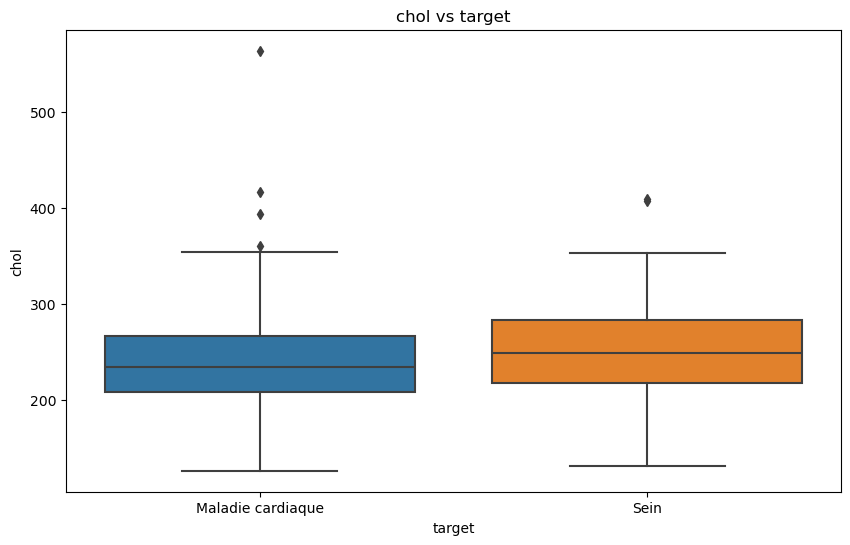

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Taille des tableaux de données : (303, 14)


C:\Users\LnD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LnD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LnD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LnD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LnD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

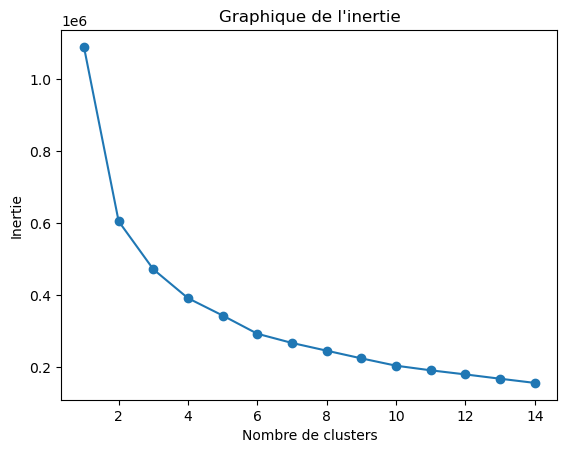

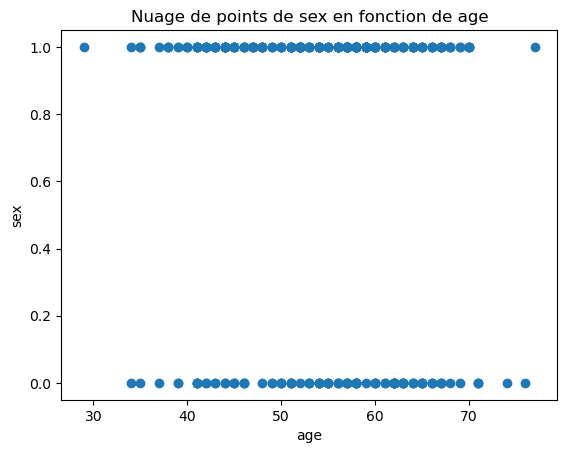

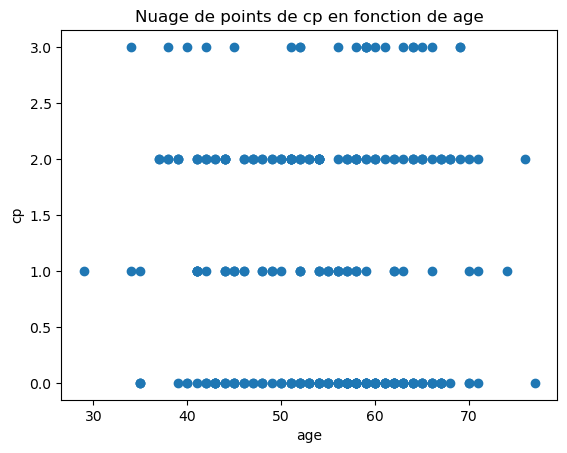

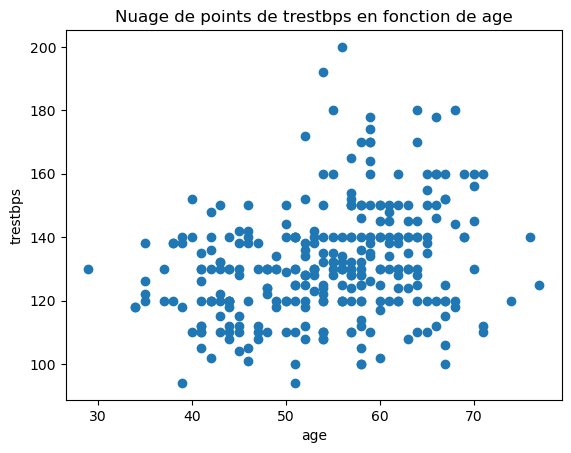

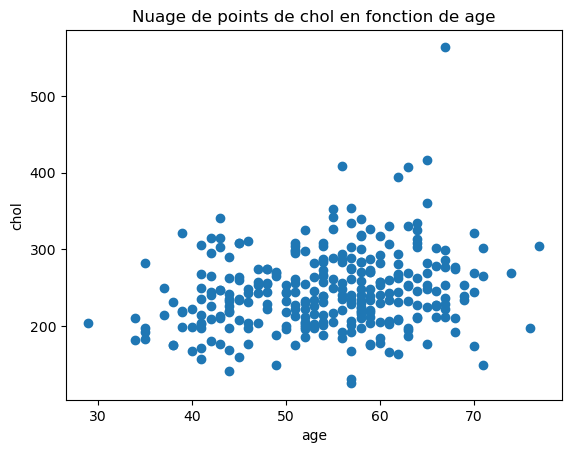

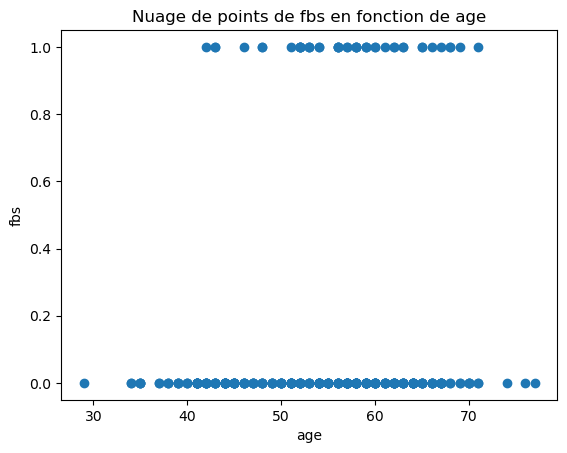

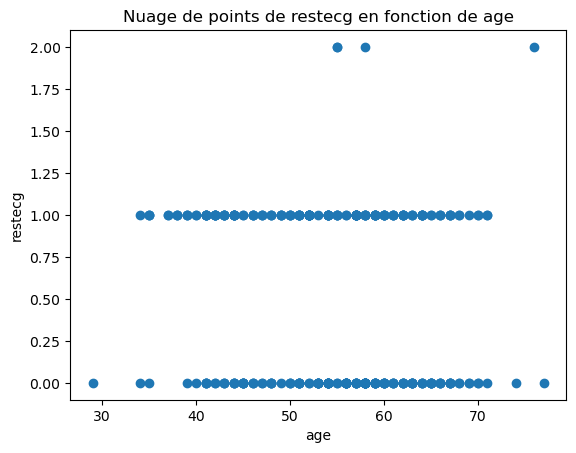

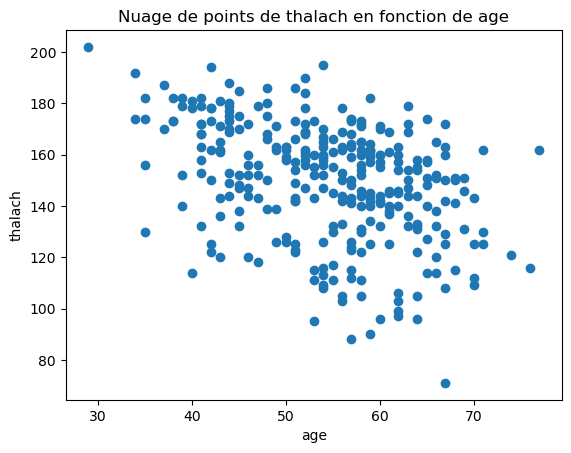

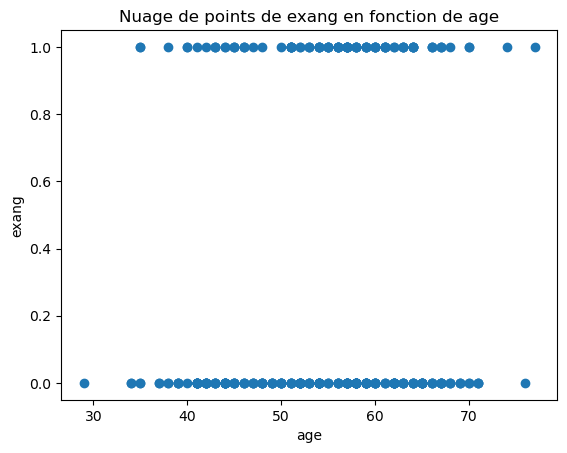

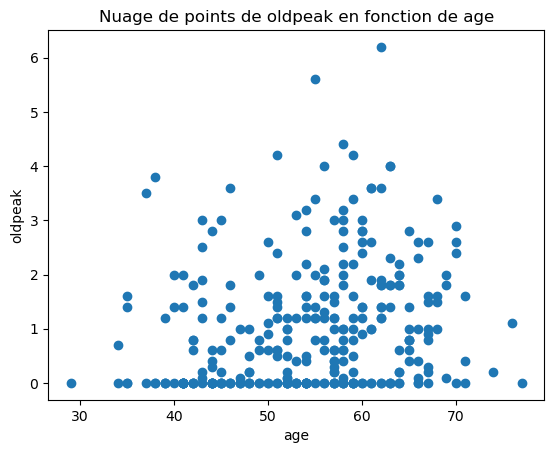

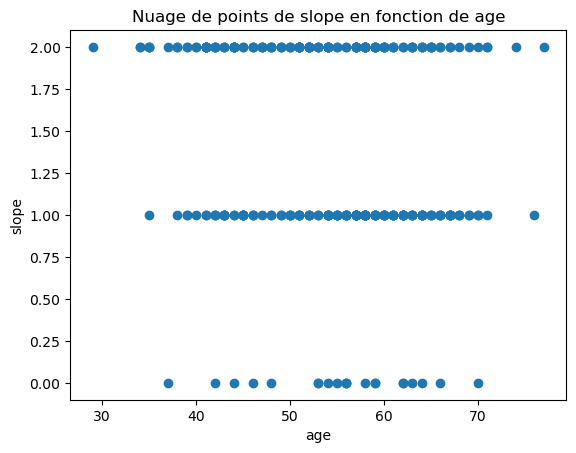

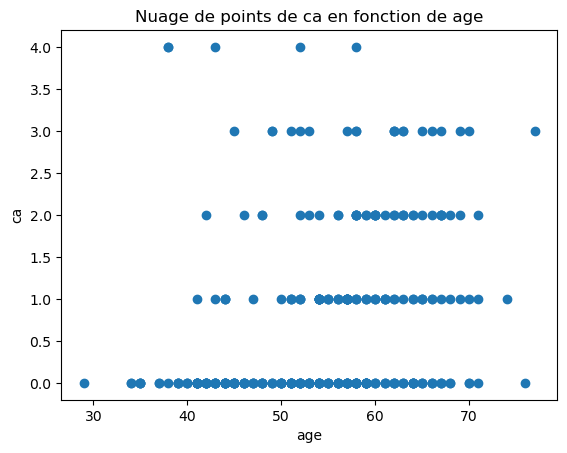

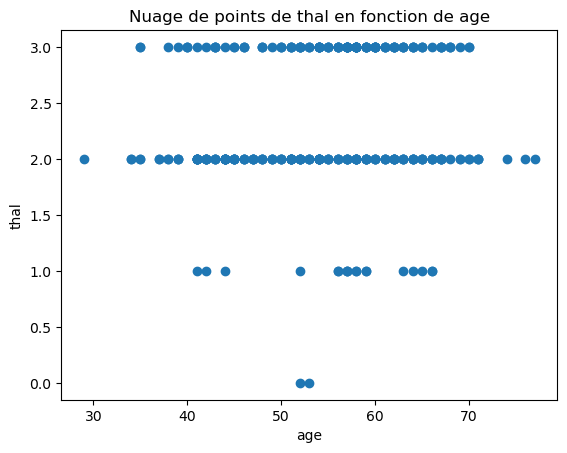

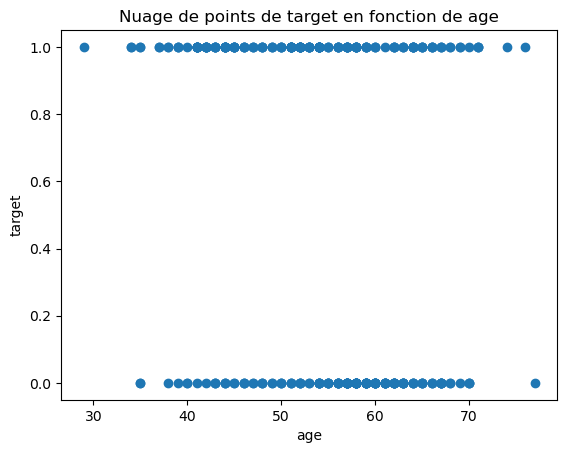

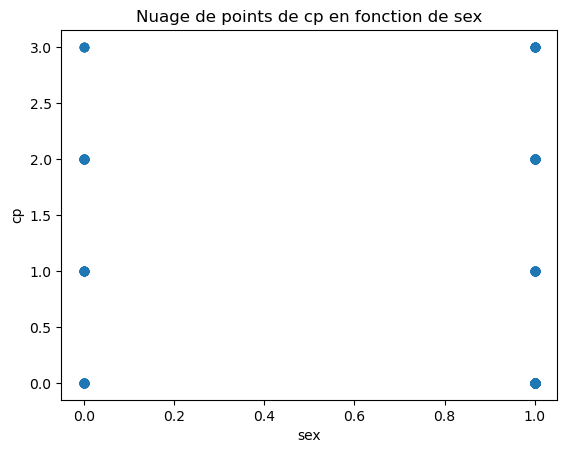

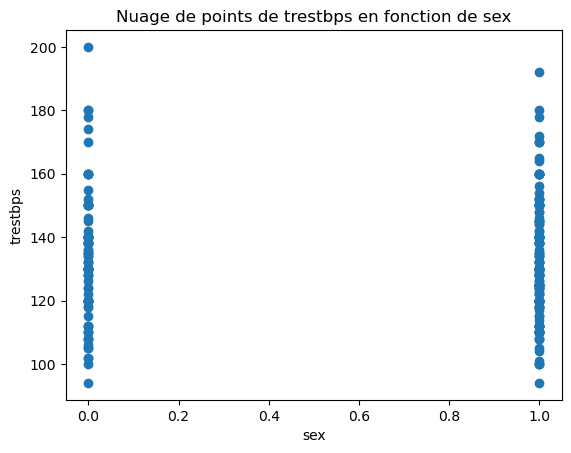

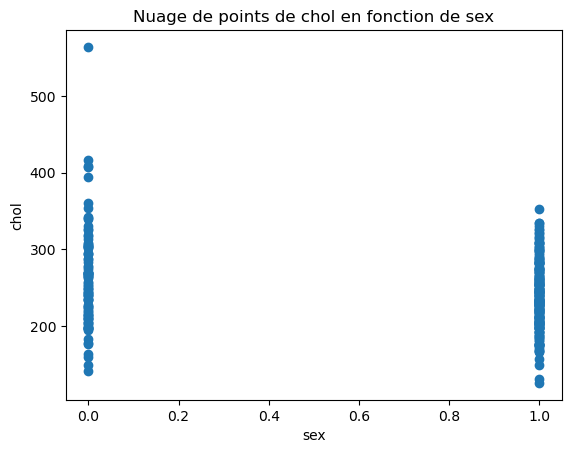

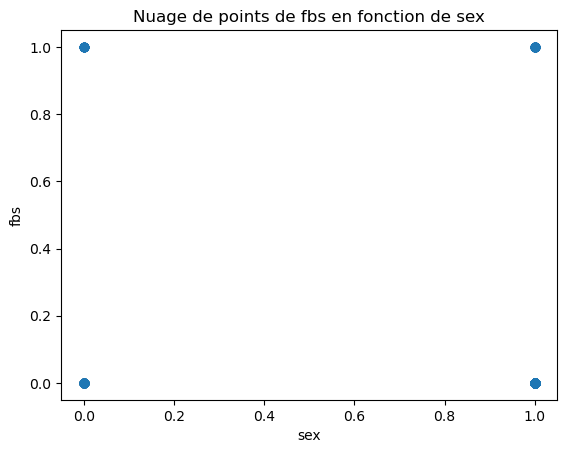

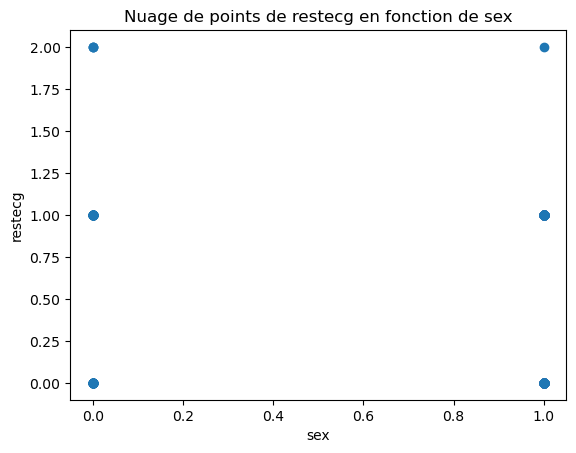

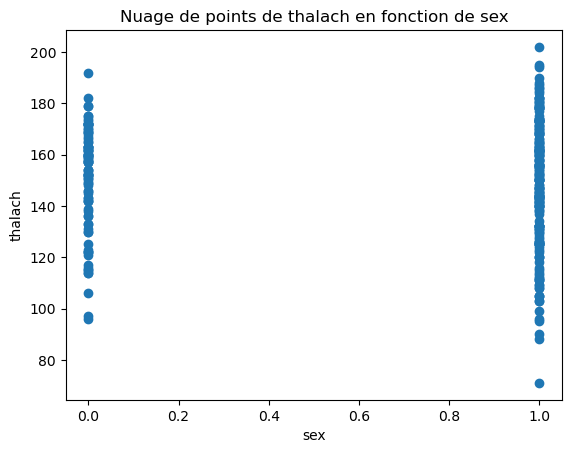

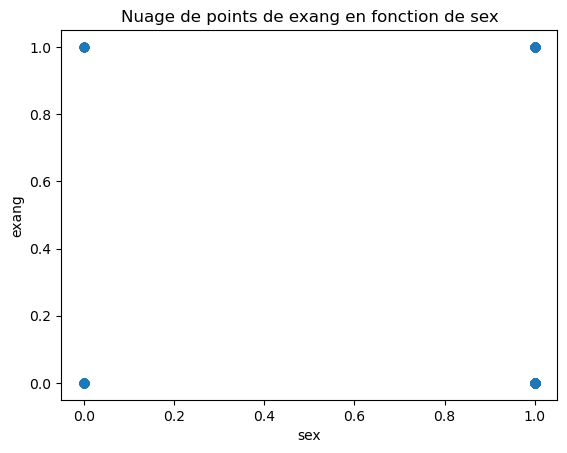

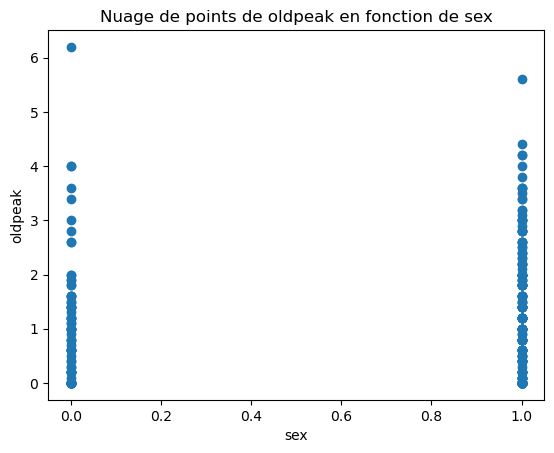

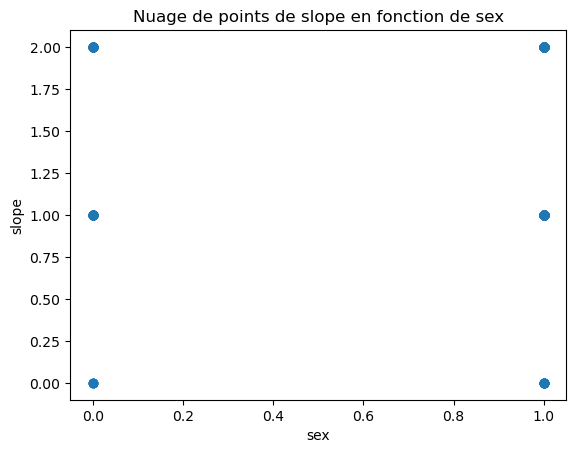

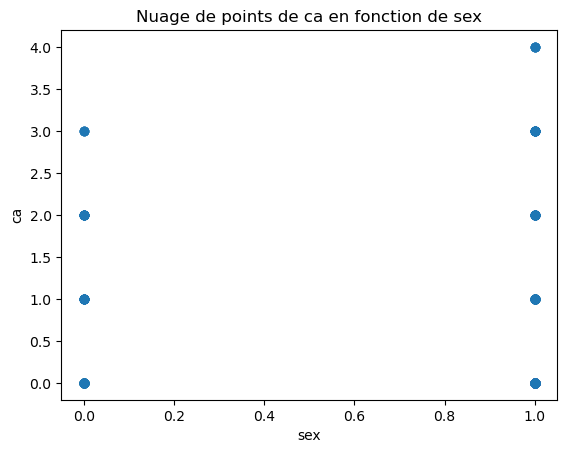

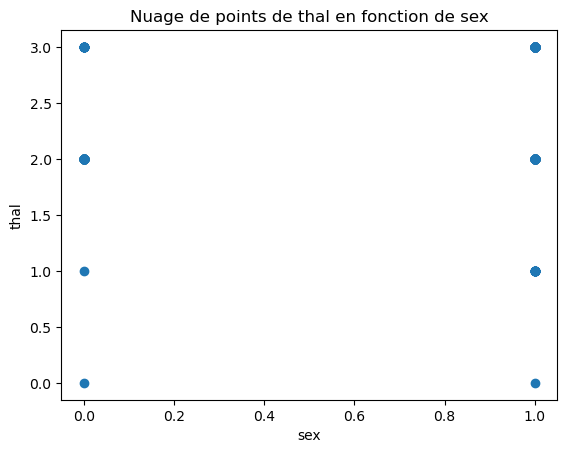

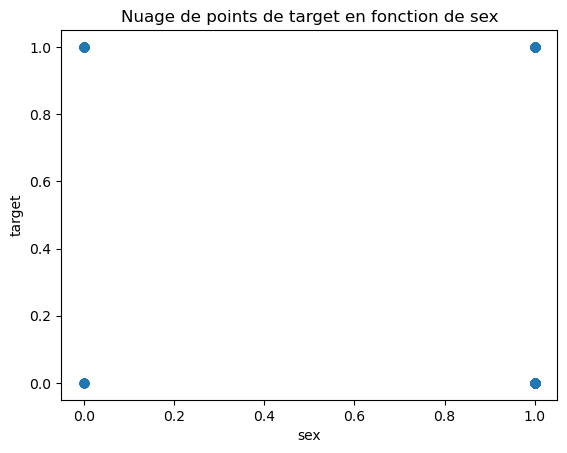

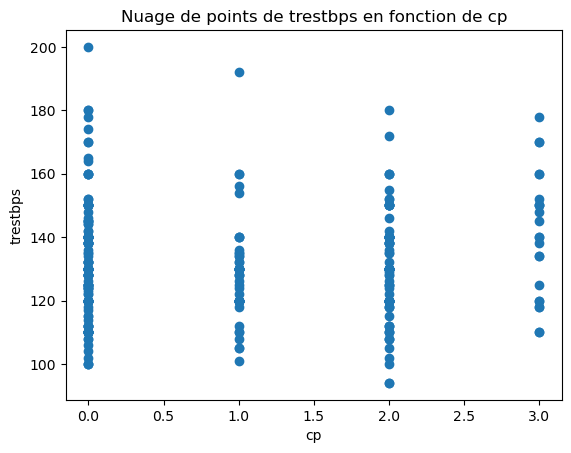

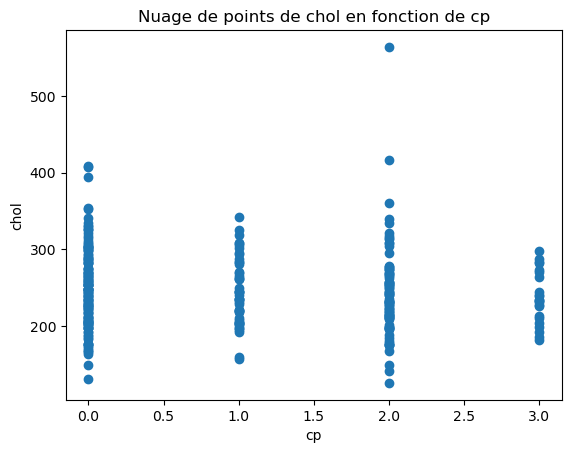

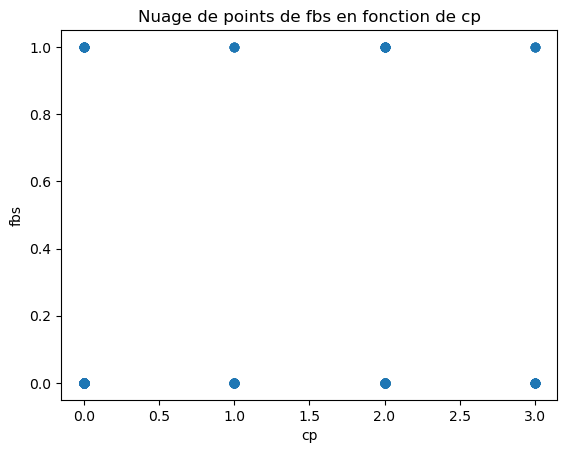

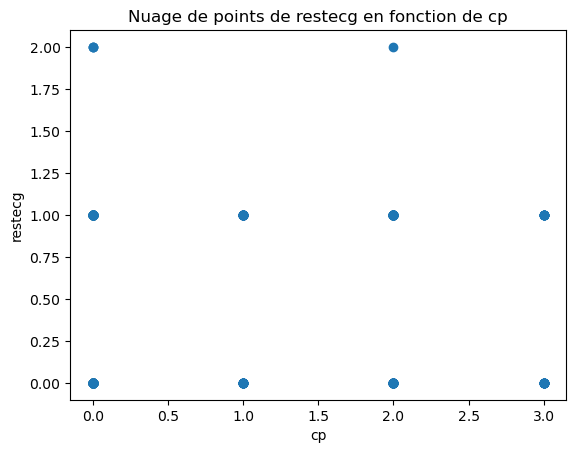

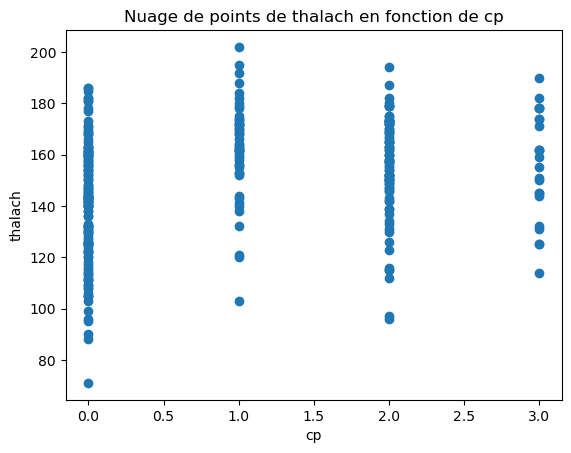

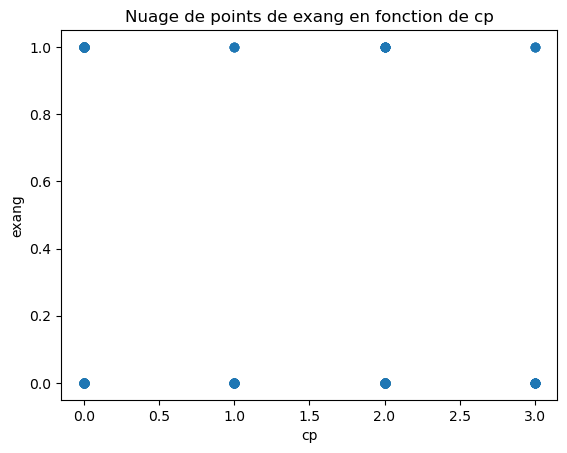

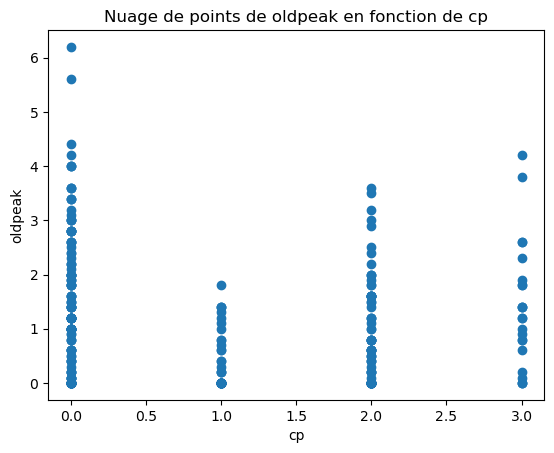

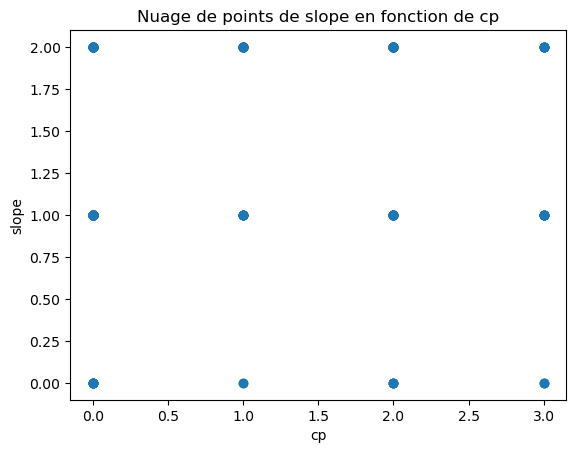

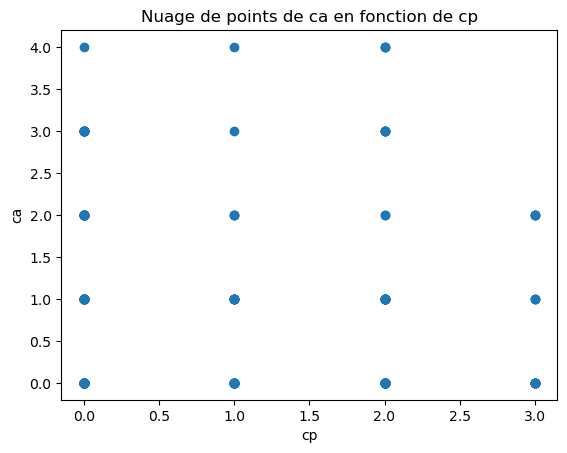

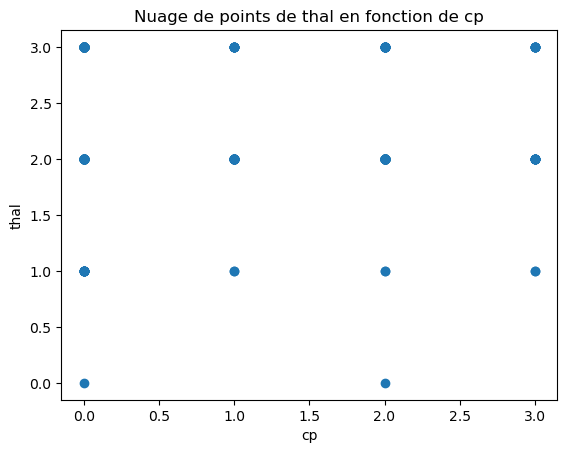

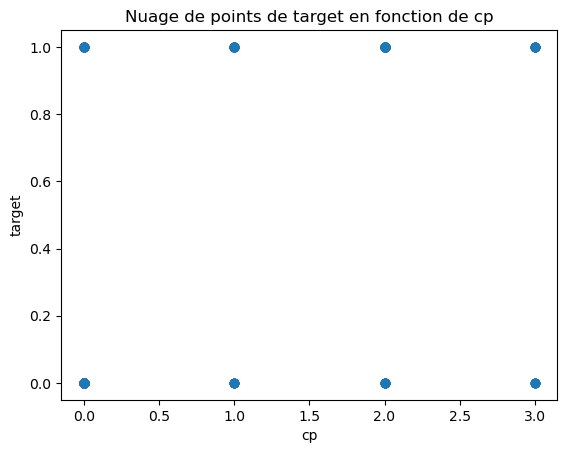

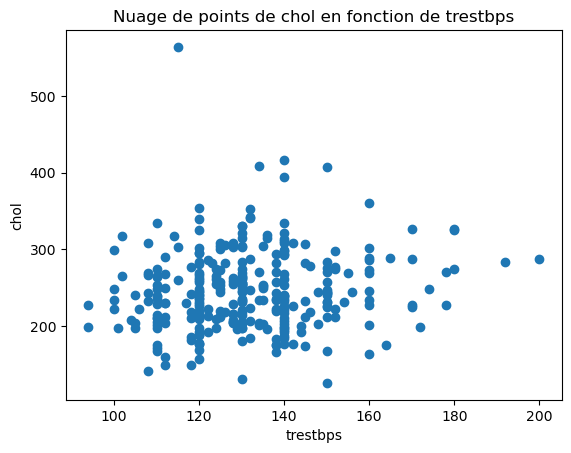

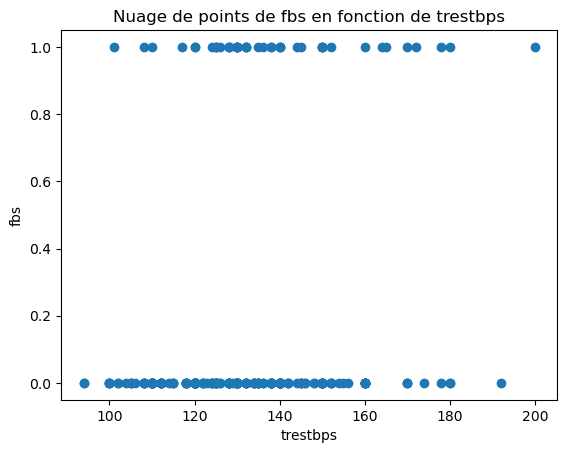

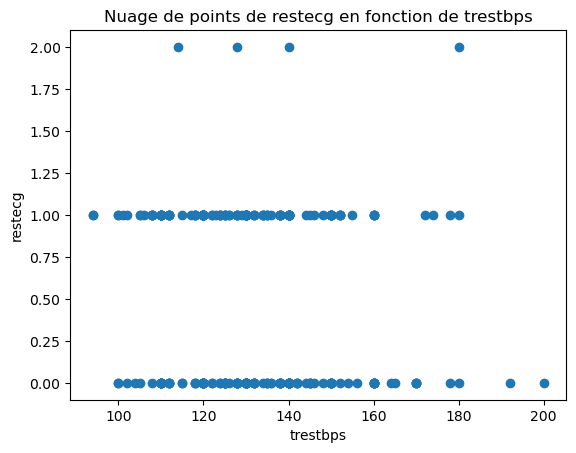

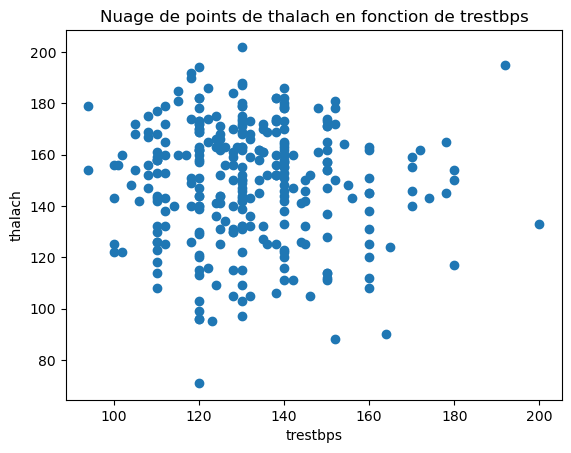

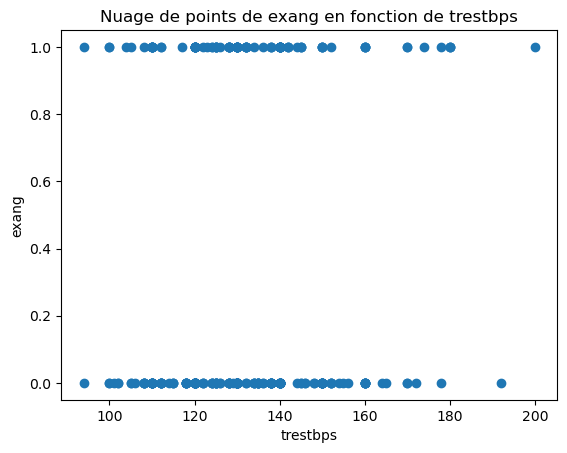

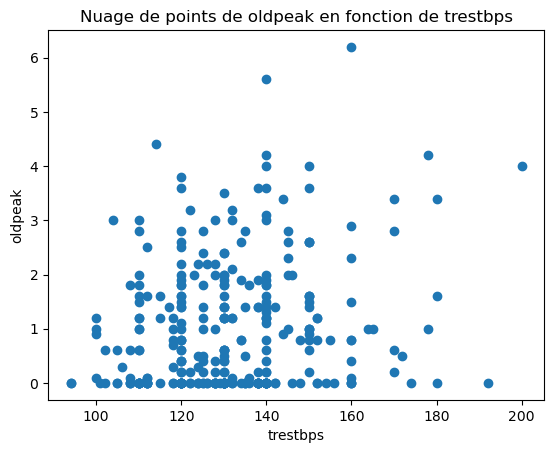

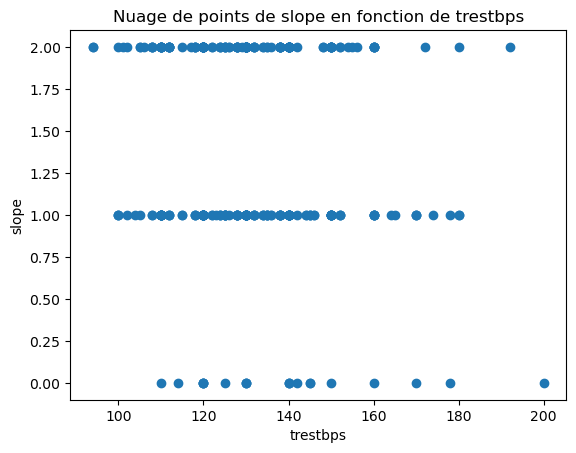

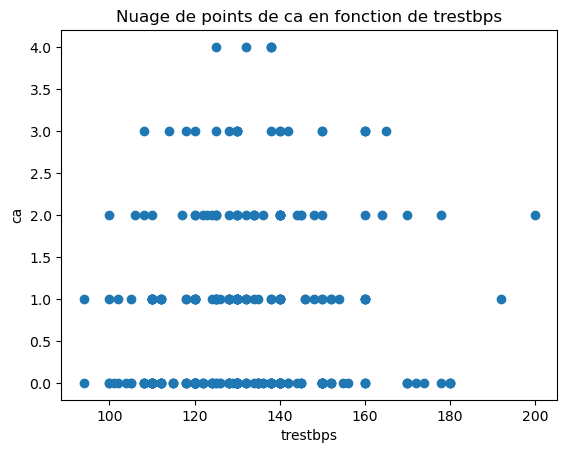

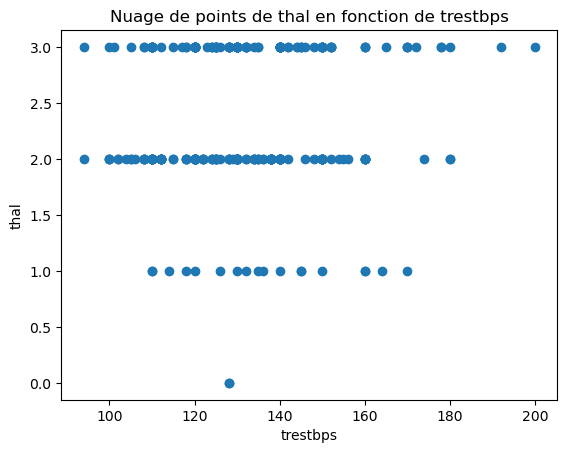

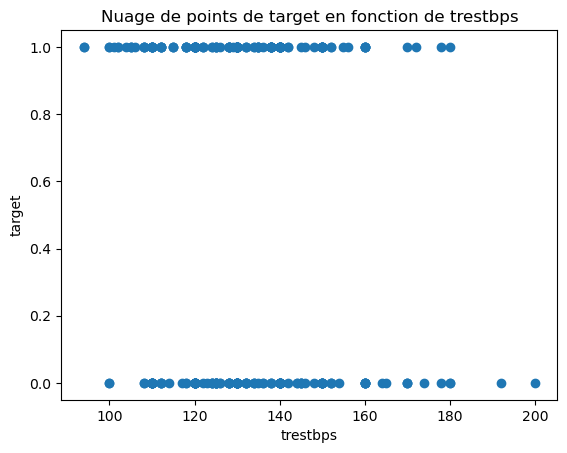

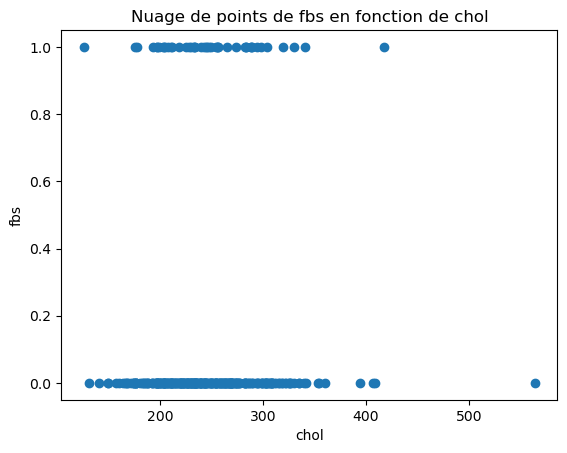

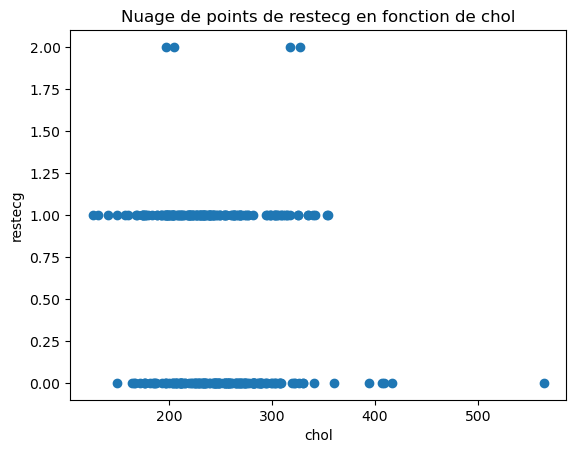

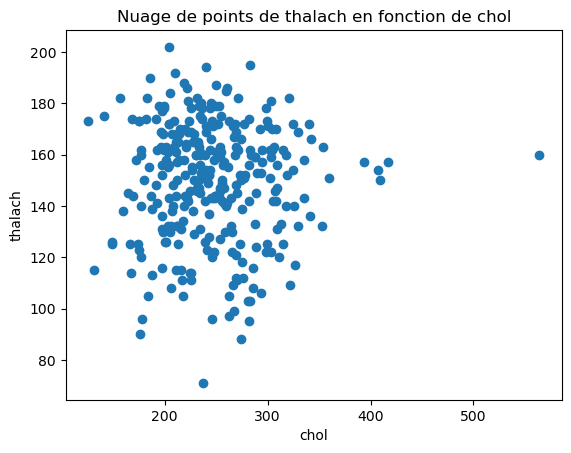

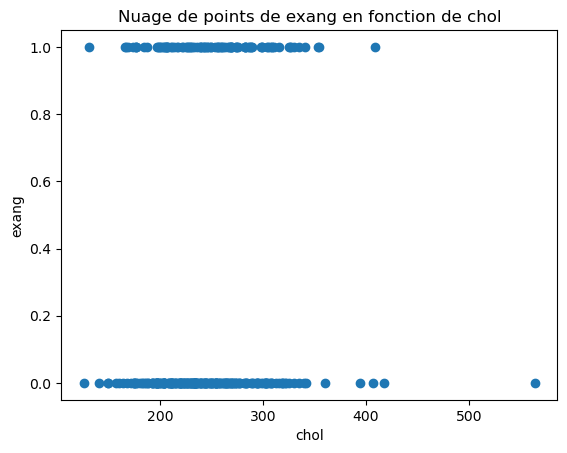

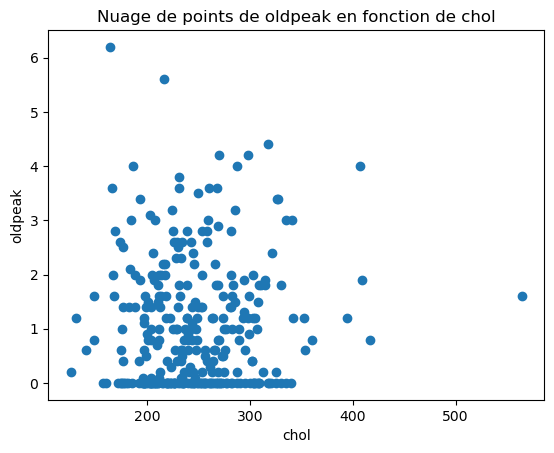

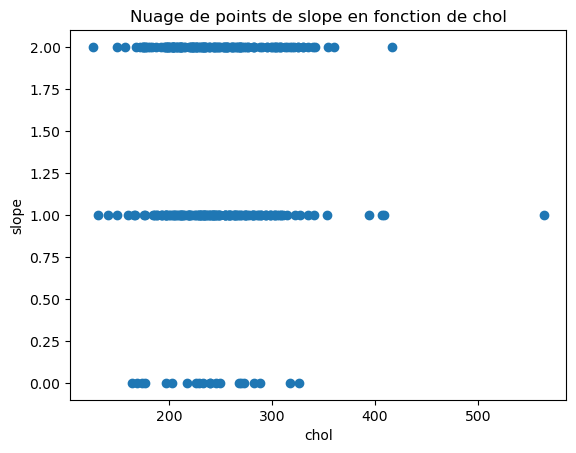

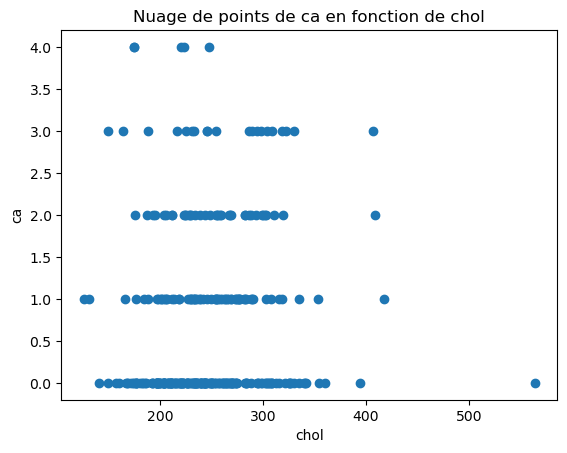

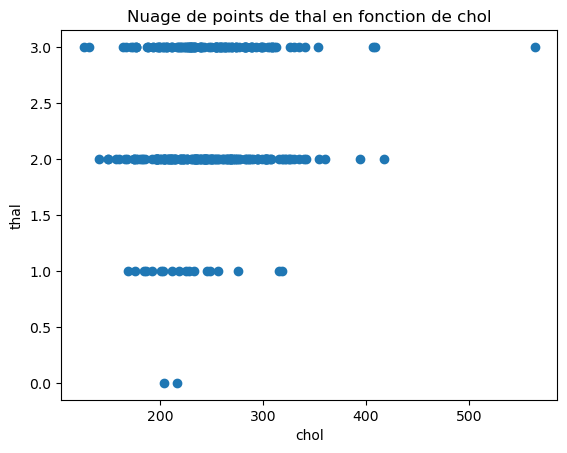

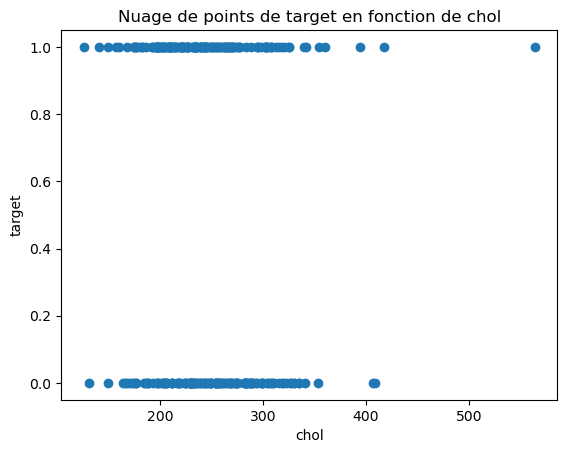

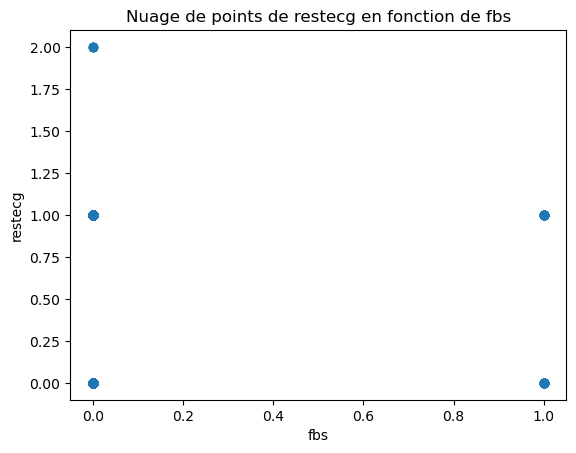

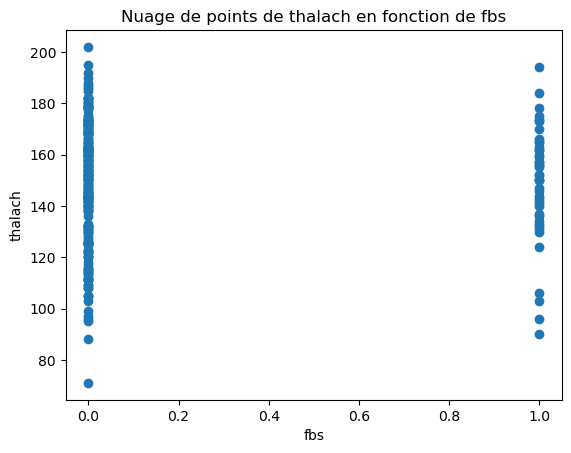

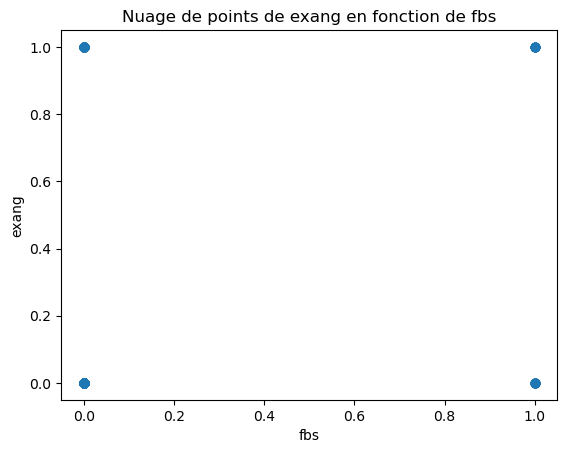

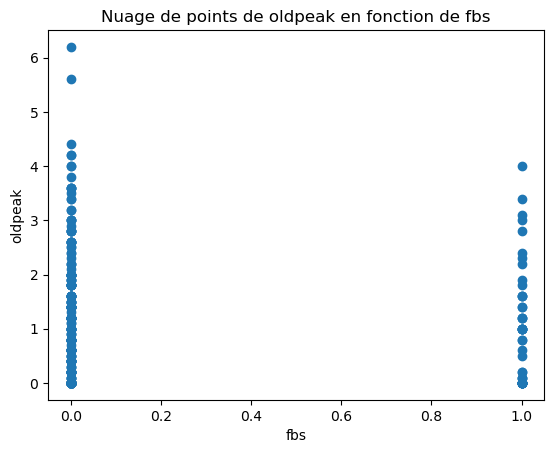

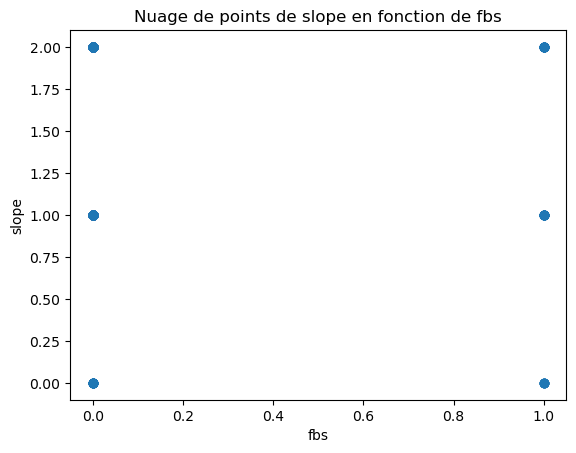

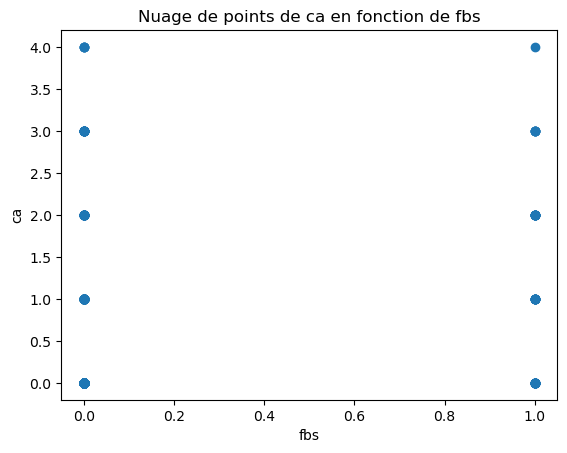

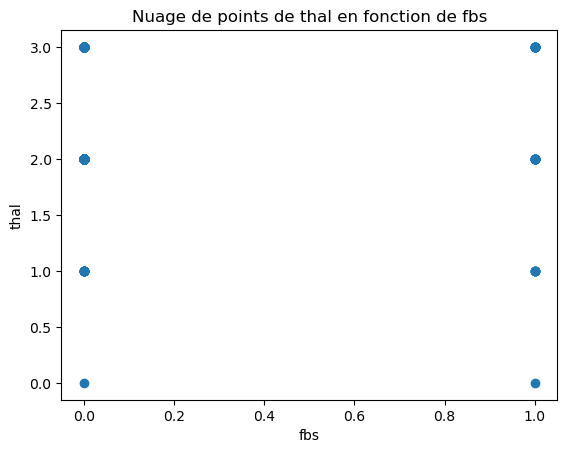

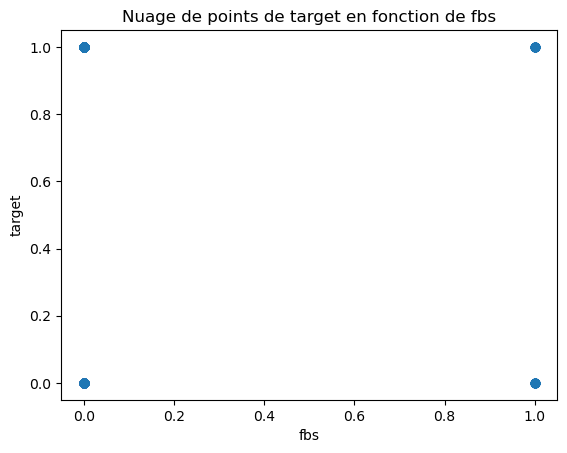

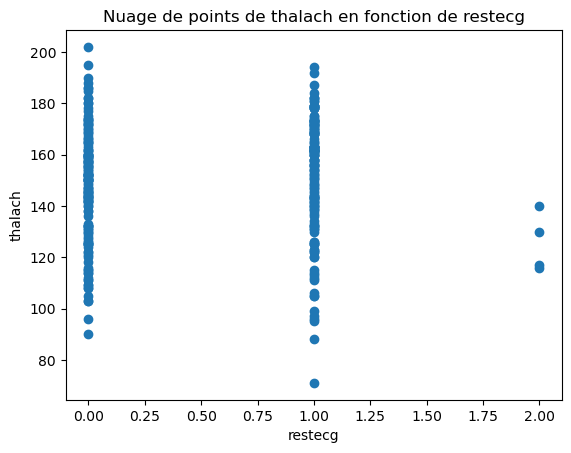

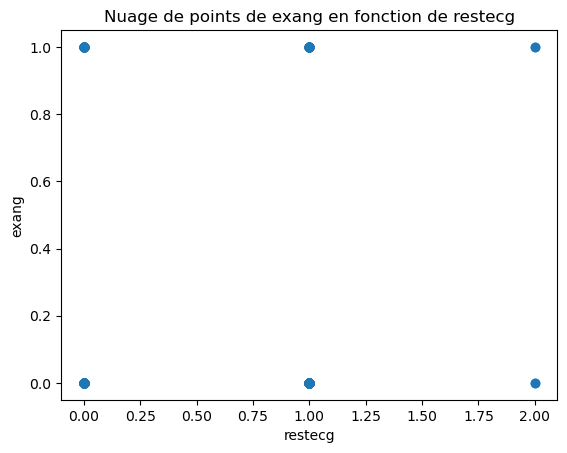

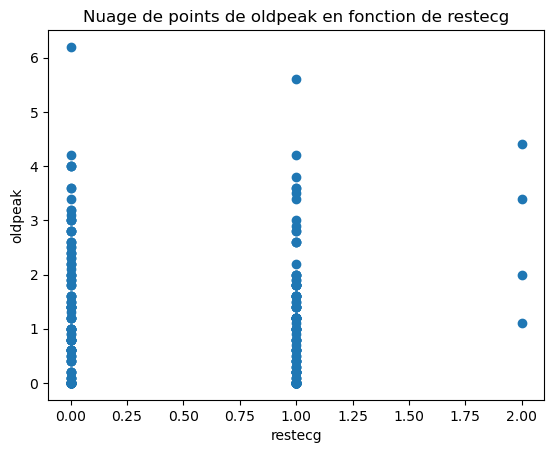

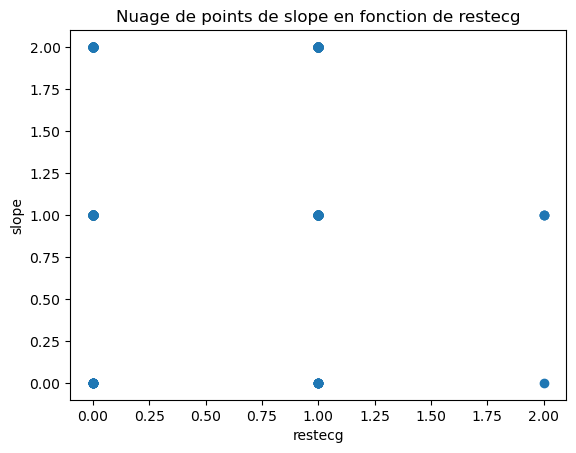

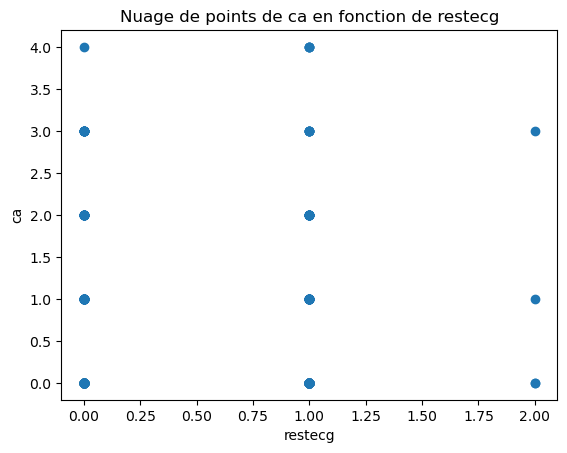

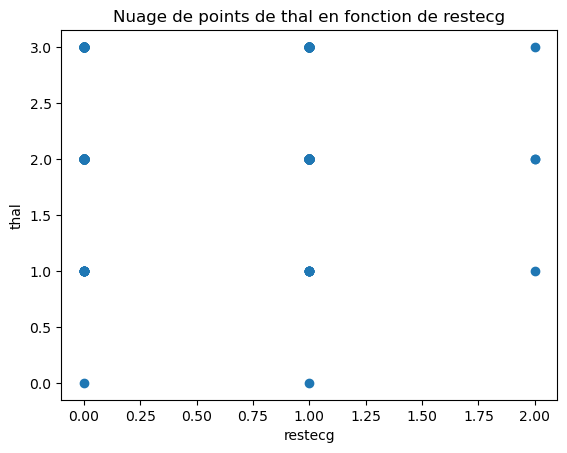

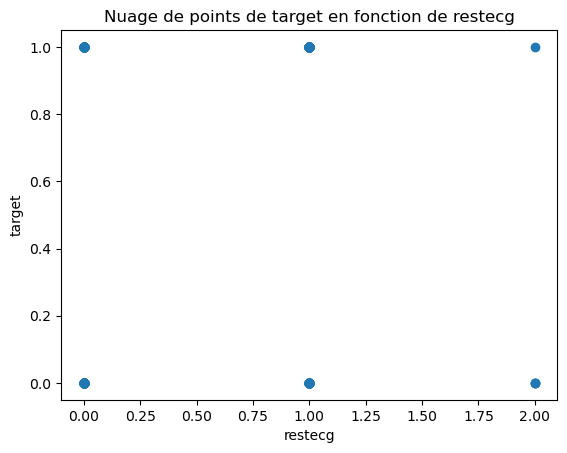

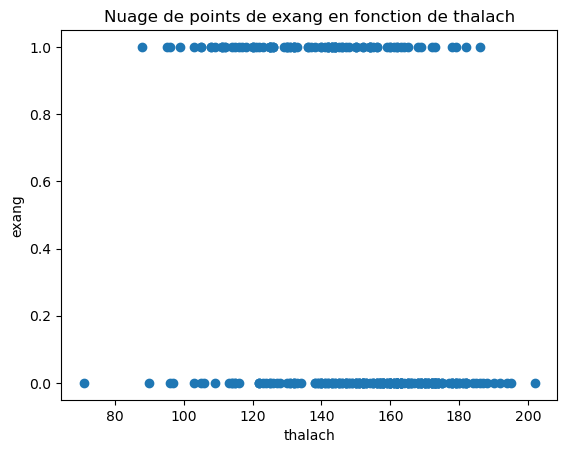

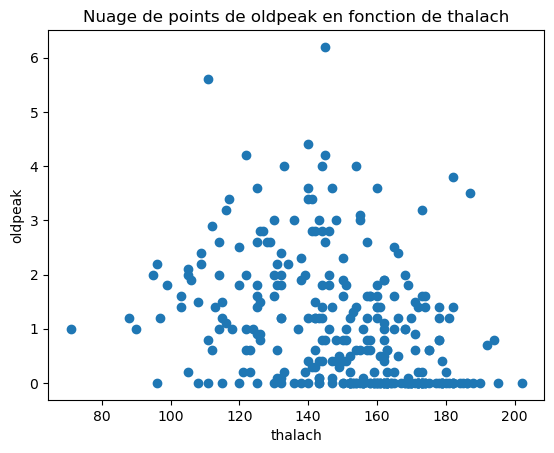

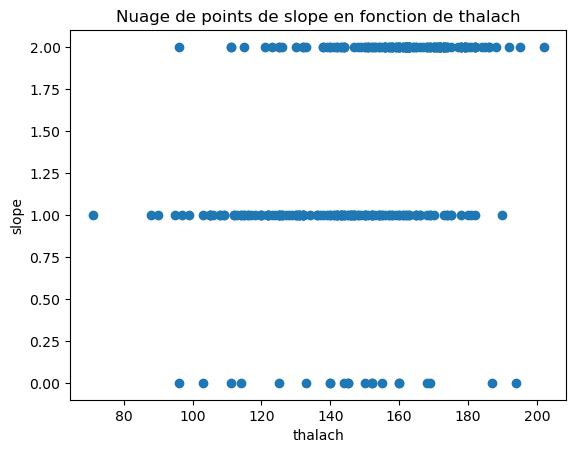

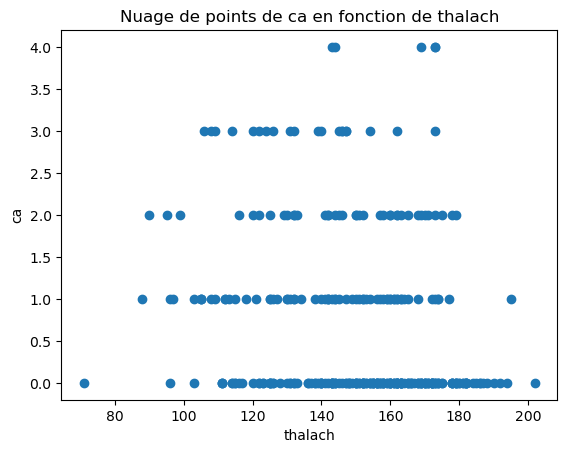

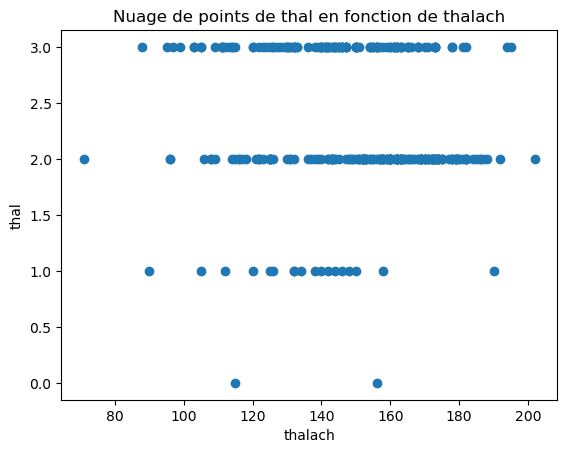

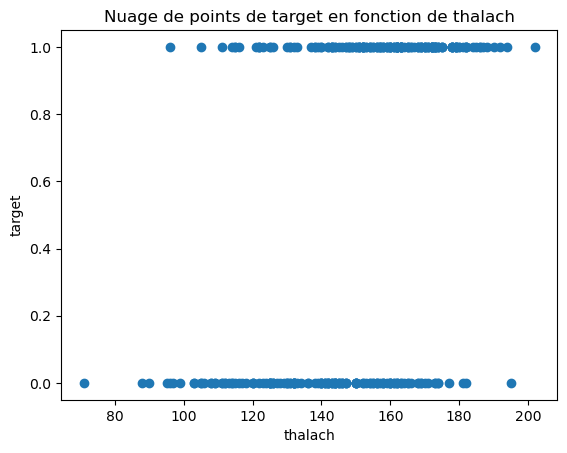

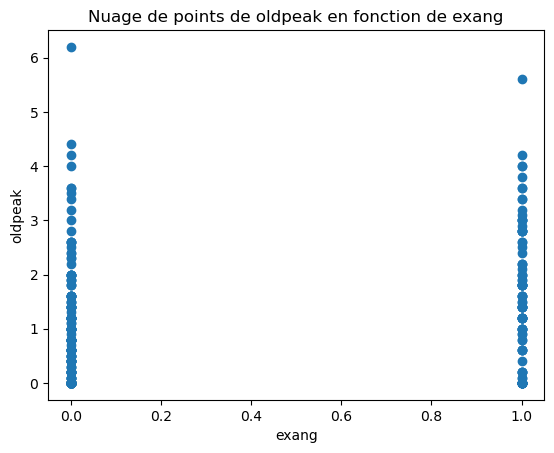

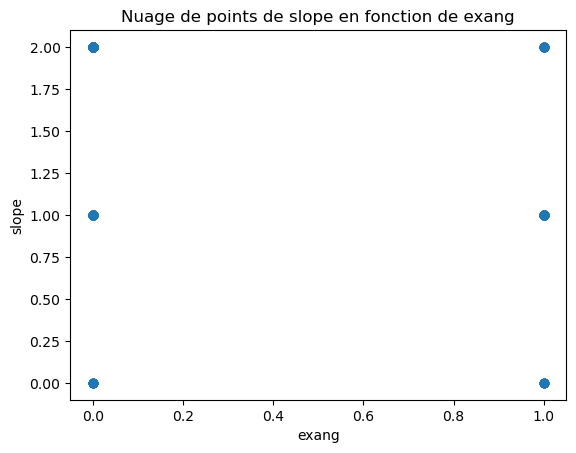

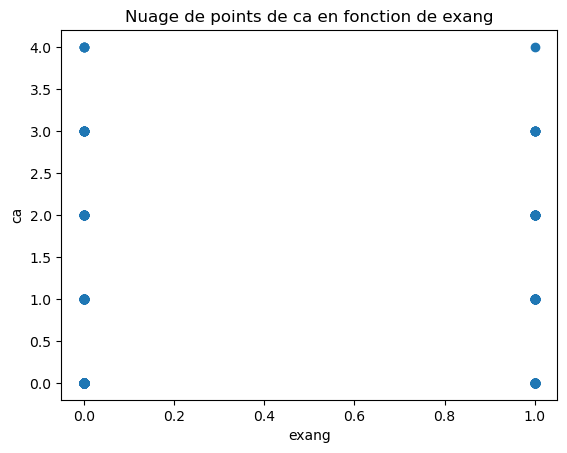

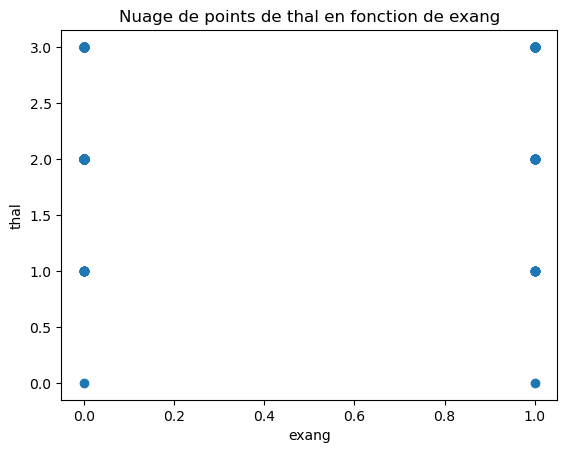

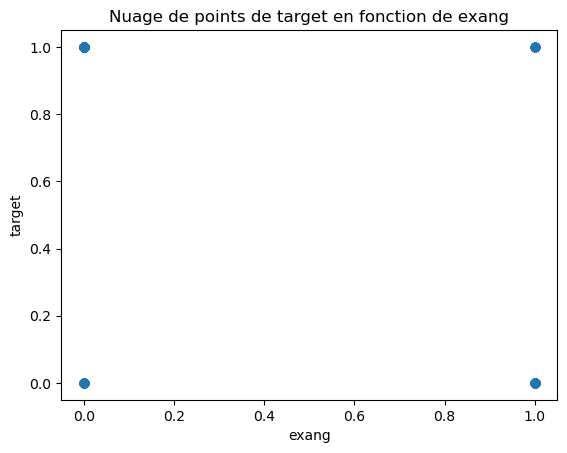

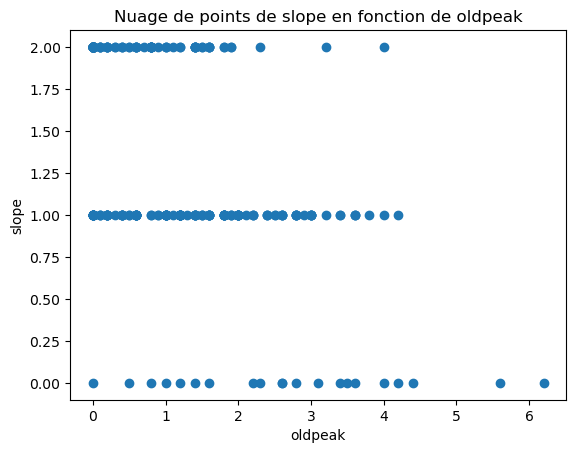

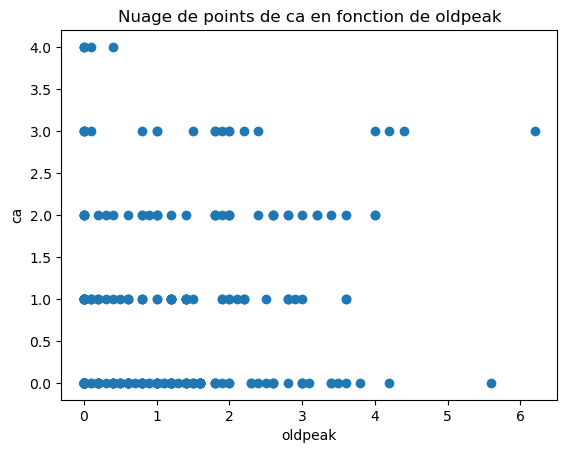

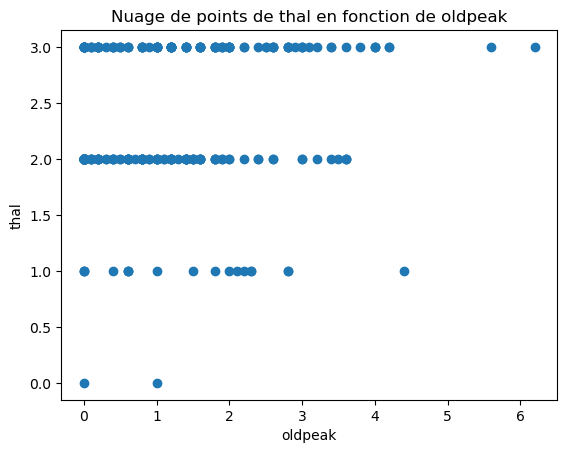

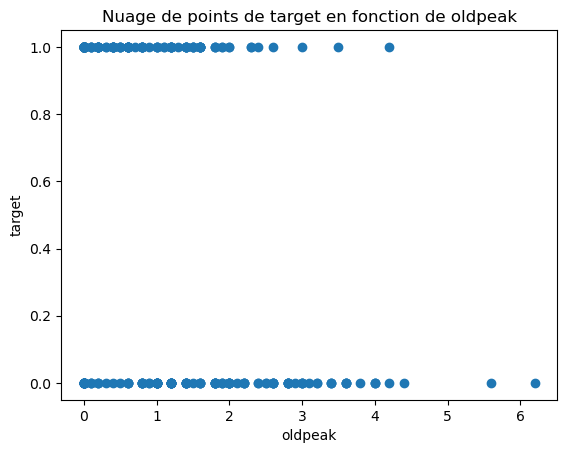

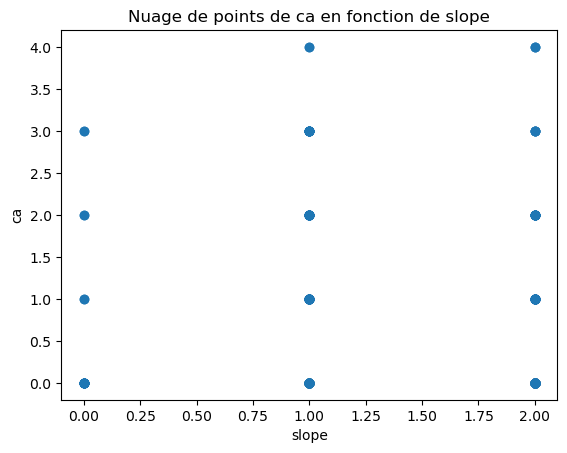

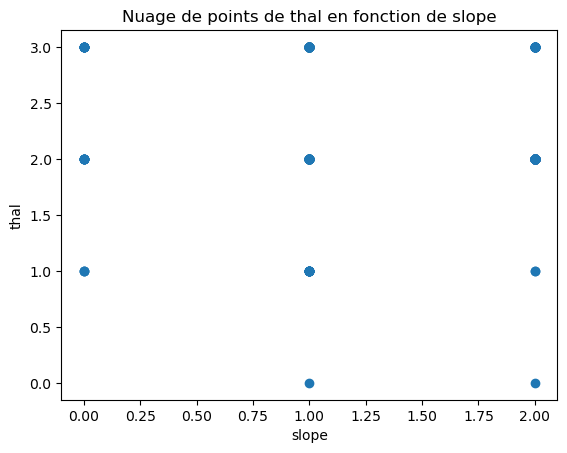

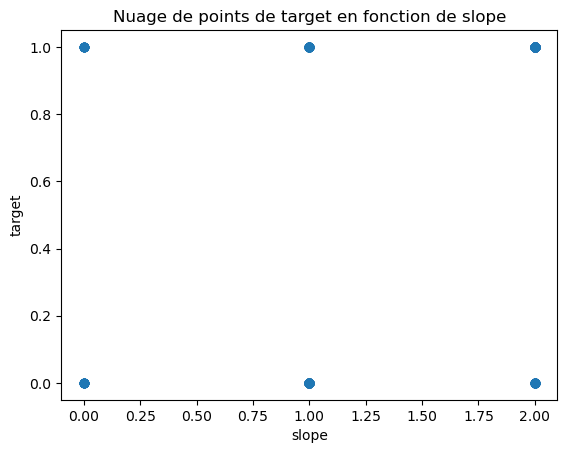

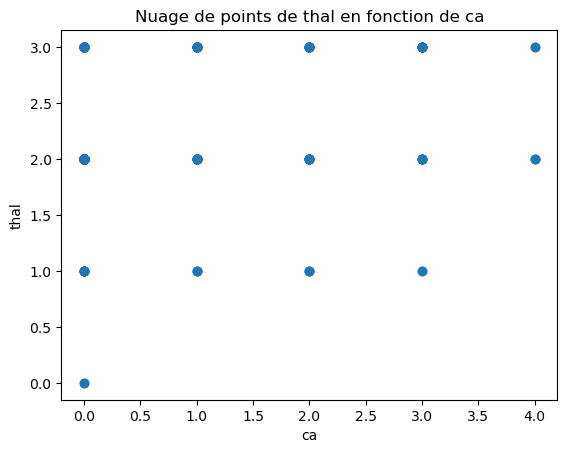

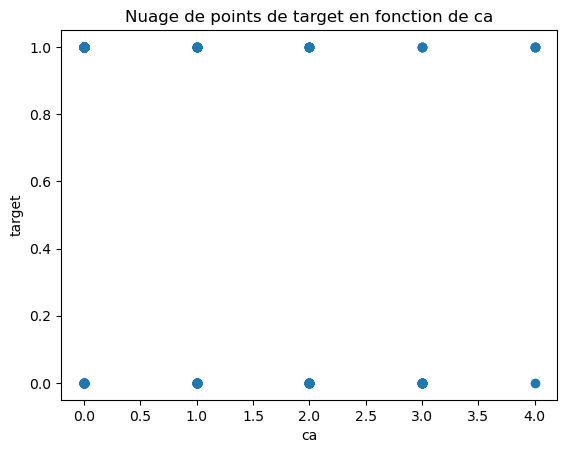

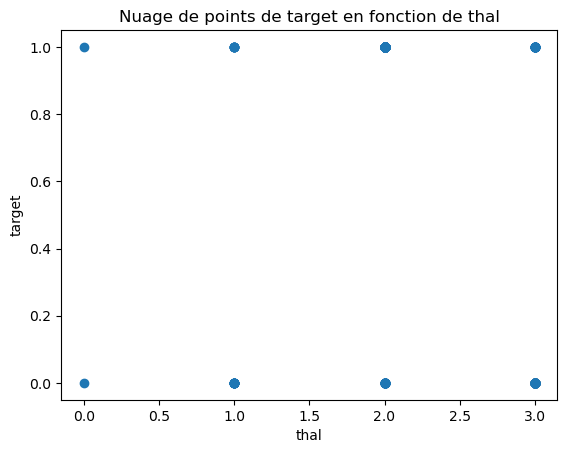

explained variance: [2.69586730e+03 5.42310975e+02 3.05074420e+02 5.84780439e+01
 1.44570855e+00 1.02439701e+00 8.25985953e-01 3.71280738e-01
 2.82883684e-01 2.12092343e-01 1.89675533e-01 1.47822188e-01
 1.15954910e-01 1.01306795e-01]
explained variance ratio: [7.47513181e-01 1.50372610e-01 8.45913853e-02 1.62148591e-02
 4.00867728e-04 2.84045978e-04 2.29030333e-04 1.02949149e-04
 7.84383128e-05 5.88092083e-05 5.25934495e-05 4.09883060e-05
 3.21521106e-05 2.80904643e-05]


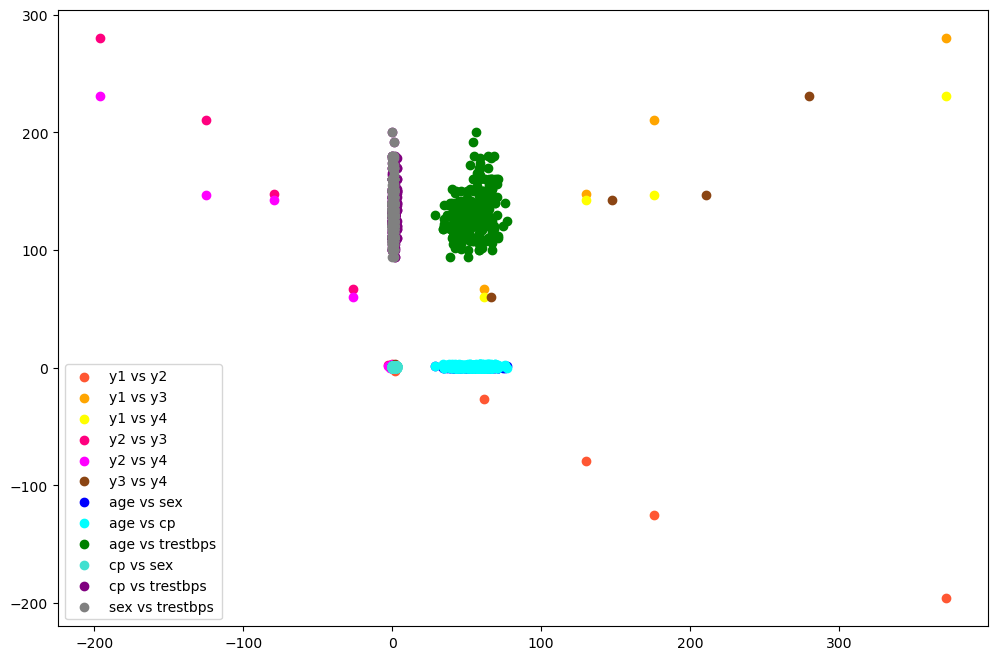

In [4]:
### ACQUISITION DES DONNEES   ###
df = acquisition_donnees(datapath, file)

###   DIFFERENTS TRACES POUR VISUALISER LES DONNEES   ###
# tracé des histogrammes
histogrammes(df)

# Suppression des variables catégorielles pour ne garder que les variables continues pour le heatmap
variables_continues = df.iloc[:, [0, 3, 4, 7, 9]]

# tracé de la carte de chaleur des corrélations entre les variables continues
correlation_heatmap(variables_continues)

# Comparaison de la pression artérielle au repos (trestbps) en fonction du sexe
plot_continuous_vs_categorical(df, 'trestbps', 'sex')

# Comparaison du cholestérol sérique (chol) en fonction du sexe
plot_continuous_vs_categorical(df, 'chol', 'sex')

# Comparaison du taux maximal de battements cardiaques atteints (thalach) en fonction du sexe
plot_continuous_vs_categorical(df, 'thalach', 'sex')

# Comparaison de la distribution du cholestérol sérique (chol) par type de douleur thoracique (cp)
plot_distribution_by_category(df, 'chol', 'cp')

# Comparaison de l'âge en fonction de la présence de maladie cardiaque
plot_continuous_vs_target(df, 'target', 'age')

# Comparaison de la pression artérielle au repos en fonction de la présence de maladie cardiaque
plot_continuous_vs_target(df, 'target', 'trestbps')

# Comparaison du cholestérol sérique en fonction de la présence de maladie cardiaque
plot_continuous_vs_target(df, 'target', 'chol')

### Je ne vois pas de correlation évidente donc je fais un Kmeans puis prépare mes données pour un PCA   ###

# acquisition des données pour repartir sur des valeurs propres
df = acquisition_donnees(datapath, file)

# préparation des jeux de données
age = df.iloc[:,0]
sex = df.iloc[:,1]
cp = df.iloc[:,2]
trestbps = df.iloc[:,3]
chol = df.iloc[:,4]
fbs = df.iloc[:,5]
restecg = df.iloc[:,6]
thalach = df.iloc[:,7]
exang = df.iloc[:,8]
oldpeak = df.iloc[:,9]
slope = df.iloc[:,10]
ca = df.iloc[:,11]
thal = df.iloc[:,12]
target = df.iloc[:,13]

# je crée un array puis transposé
donnees = np.array([age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target]).T
print(f"Taille des tableaux de données : {donnees.shape}")

# je lance le Kmeans
kmeans(donnees)

# création de la liste des colonnes
liste_colonnes = df.columns

# création des graphiques pour comparer toutes les colonnes entre elles
comparatif(liste_colonnes, df)

###   Il ne semble pas y avoir de correlation   ###

# j'instancie un PCA
pca = PCA()

#X_r = pca.fit(donnee).transform(donnee) ou alternative
X_r = pca.fit_transform(donnees)

# affichage de l'explained variance et de son ratio
print(
    "explained variance: %s"
    % str(pca.explained_variance_)
)

print(
    "explained variance ratio: %s"
    % str(pca.explained_variance_ratio_)
)
# les 3 premiers éléments semblent représenter plus de 99% (74.8 + 15 + 8.5 + 1.6)

# calcul des coefficients et des 4 nouvelles variables
p = pca.components_

liste = [age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target]
y1, y2, y3, y4 = 0,0,0,0
for i in range(len(liste)):
    y1 += p[0][i]*donnees[i]
    y2 += p[1][i]*donnees[i]
    y3 += p[2][i]*donnees[i]
    y4 += p[3][i]*donnees[i]

# affichage du graphique avec les nouvelles variables et les 4 principales anciennes
nouvelles_variables(y1,y2,y3,y4,age,sex,cp,trestbps)
